In [86]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("albatross_foil-camber_line.csv")

# Display the first 5 rows
display(df.head())

# Convert DataFrame to dictionary
foil_dict = dict(zip(df["X(mm)"], df["Y(mm)"]))
display(foil_dict)

x_foil = df["X(mm)"].tolist()
y_foil = df["Y(mm)"].tolist()

,X(mm),Y(mm)
0,0.000,0.000000
1,1.241,0.978000
2,2.486,1.335821
3,4.978,2.261891
4,7.473,3.007482


{0.0: 0.0,
 1.241: 0.978,
 2.486: 1.335821,
 4.978: 2.261891,
 7.473: 3.007482,
 9.968: 3.629307,
 14.962: 4.642119,
 19.958: 5.270297,
 29.956: 5.816957,
 39.956: 5.908512,
 49.96: 5.539977,
 59.965: 4.806317,
 69.972: 3.832384,
 79.98: 2.728385,
 89.989: 1.524238,
 94.994: 0.842138,
 100.0: 0.0}

$y(x) = \begin{cases} 0.0757438198145068 x^{3} - 0.48369211108273 x^{2} + 1.27168442585302 x & \text{for}\: x \geq 0 \wedge x \leq 2.486 \\- 0.0164005768176812 x^{3} + 0.203520799000128 x^{2} - 0.436726868612968 x + 1.41570349268081 & \text{for}\: x \geq 2.486 \wedge x \leq 4.978 \\0.0051175805847793 x^{3} - 0.117831363648218 x^{2} + 1.16296419705049 x - 1.23871721561009 & \text{for}\: x \geq 4.978 \wedge x \leq 7.473 \\- 0.000365930224799395 x^{3} + 0.00510346519172705 x^{2} + 0.244272221129586 x + 1.0497444964089 & \text{for}\: x \geq 7.473 \wedge x \leq 9.968 \\- 0.000199278194540061 x^{3} + 0.000119902878852579 x^{2} + 0.293948370264324 x + 0.884687211550524 & \text{for}\: x \geq 9.968 \wedge x \leq 14.962 \\0.000245238196808445 x^{3} - 0.0198326598632167 x^{2} + 0.592478614011156 x - 0.604182624096177 & \text{for}\: x \geq 14.962 \wedge x \leq 19.958 \\0.00012274930637512 x^{3} - 0.0124987600374118 x^{2} + 0.446108641287747 x + 0.369568014441756 & \text{for}\: x \geq 19.958 \wedge x \leq 29.956 \\- 3.90384183972492 \cdot 10^{-5} x^{3} + 0.00204077921243152 x^{2} + 0.0105622035194419 x + 4.71864437770423 & \text{for}\: x \geq 29.956 \wedge x \leq 39.956 \\2.88369943703519 \cdot 10^{-5} x^{3} - 0.00609531076519523 x^{2} + 0.335647814665496 x + 0.388937484720252 & \text{for}\: x \geq 39.956 \wedge x \leq 49.96 \\1.873961567553 \cdot 10^{-5} x^{3} - 0.0045819156464153 x^{2} + 0.260038594531253 x + 1.64808303068919 & \text{for}\: x \geq 49.96 \wedge x \leq 59.965 \\2.10662735920923 \cdot 10^{-5} x^{3} - 0.00500046977231526 x^{2} + 0.28513719269084 x + 1.14640388447584 & \text{for}\: x \geq 59.965 \wedge x \leq 69.972 \\6.97096097190038 \cdot 10^{-6} x^{3} - 0.00204163812833513 x^{2} + 0.0781018248982628 x + 5.97529680286998 & \text{for}\: x \geq 69.972 \wedge x \leq 79.98 \\- 1.90634019269676 \cdot 10^{-5} x^{3} + 0.00420504690561922 x^{2} - 0.421508044117408 x + 19.2948959108278 & \text{for}\: x \geq 79.98 \wedge x \leq 89.989 \\- 0.000149790157233174 x^{3} + 0.0394969568553698 x^{2} - 3.59739172858552 x + 114.559761538028 & \text{for}\: x \geq 89.989 \wedge x \leq 100.0 \end{cases}$

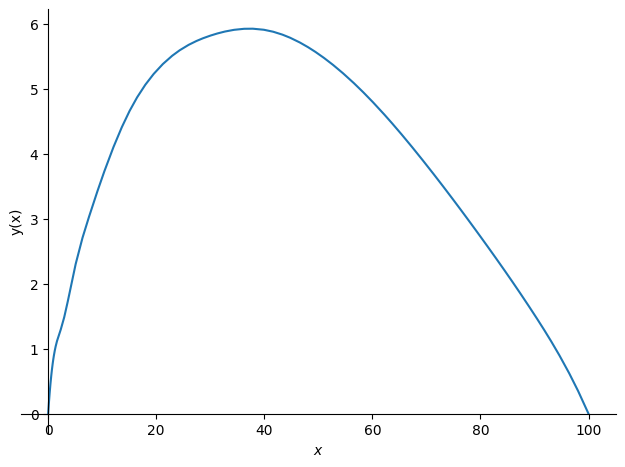

$\frac{dy}{dx}(\theta) = \begin{cases} 568.078648608801 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 48.369211108273 \cos{\left(\theta \right)} - 47.09752668242 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -2.486 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq 0 \\- 123.004326132609 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 20.3520799000128 \cos{\left(\theta \right)} + 19.9153530313998 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -4.978 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -2.486 \\38.3818543858447 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 11.7831363648218 \cos{\left(\theta \right)} - 10.6201721677713 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -7.473 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -4.978 \\- 2.74447668599546 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.510346519172705 \cos{\left(\theta \right)} + 0.754618740302291 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -9.968 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -7.473 \\- 1.49458645905046 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.0119902878852579 \cos{\left(\theta \right)} + 0.305938658149582 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -14.962 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -9.968 \\1.83928647606334 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 1.98326598632167 \cos{\left(\theta \right)} - 1.39078737231051 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -19.958 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -14.962 \\0.9206197978134 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 1.24987600374118 \cos{\left(\theta \right)} - 0.803767362453429 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -29.956 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -19.958 \\- 0.292788137979369 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.204077921243152 \cos{\left(\theta \right)} + 0.214640124762594 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -39.956 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -29.956 \\0.216277457777639 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.609531076519523 \cos{\left(\theta \right)} - 0.273883261854027 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -49.96 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -39.956 \\0.140547117566475 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.45819156464153 \cos{\left(\theta \right)} - 0.198152970110277 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -59.965 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -49.96 \\0.157997051940692 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.500046977231526 \cos{\left(\theta \right)} - 0.214909784540686 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -69.972 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -59.965 \\0.0522822072892529 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.204163812833513 \cos{\left(\theta \right)} - 0.12606198793525 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -79.98 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -69.972 \\- 0.142975514452257 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.420504690561922 \cos{\left(\theta \right)} - 0.00100335355548548 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -89.989 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -79.98 \\- 1.1234261792488 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 3.94969568553698 \cos{\left(\theta \right)} + 0.352303956951467 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -100.0 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -89.989 \end{cases}$

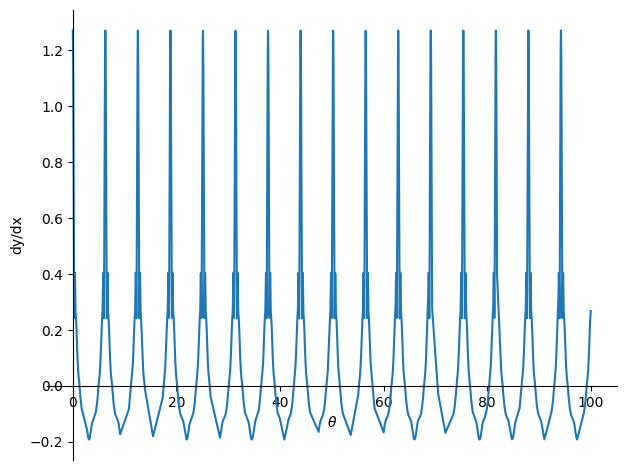

$C_l = 6.28318530717959 \alpha + 0.63959809779726$

In [105]:
import sympy as sp
from IPython.display import Markdown

alpha, theta, x = sp.symbols("alpha, theta, x")
chord_length = 100 # mm

# Construct an interpolating polynomial for x_foil and y_foil
y_func_x = sp.interpolating_spline(3, x, x_foil, y_foil)
display(Markdown("$y(x) = " + sp.latex(y_func_x) + "$"))
sp.plot(y_func_x, (x, 0, chord_length), ylabel="y(x)")

# Differentiate y_func_x with respect to x
dydx_func_x = y_func_x.diff(x)

# Variable substitution from x to theta
dydx_func_theta = dydx_func_x.subs(x, chord_length / 2 * (1 - sp.cos(theta)))
display(Markdown("$\\frac{dy}{dx}(\\theta) = " + sp.latex(dydx_func_theta) + "$"))
sp.plot(dydx_func_theta, (theta, 0, chord_length), ylabel="dy/dx")

# Calculate the lift coefficient
c_l = (
    2
    * sp.pi
    * (
        alpha
        + (1 / sp.pi)
        * sp.integrate(dydx_func_theta * (sp.cos(theta) - 1), (theta, 0, sp.pi))
    )
).evalf()

# Display the equation
display(Markdown("$C_l = " + sp.latex(c_l) + "$"))

In [ ]:
# Calculate lift for an Albatross moving at speed v, with a span of b, through air with density rho
velocity, span_length, density = sp.symbols("u_\\inf, b, rho")

# Calculate the lift
lift = sp.Rational(1, 2) * rho * velocity ** 2 * span_length * chord_length * c_l
display(Markdown("$L = " + sp.latex(lift) + "$"))

In [ ]:
albatross_weight = 10 # N #TODO: Add the real weight of the Albatross

# Find the angle of attack at 0 lift
alpha_0 = sp.solve(L - albatross_weight, alpha)